In [1]:
import tensorflow as tf
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from glob import glob 
from PIL import Image
import random

c:\programdata\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\envs\py37\lib\site-packages\tensorflow\python\frame

In [2]:
t=glob('train/*/*.jpg')
random.shuffle(t)
train_image=[] #image
train_label=[] #label
for i in range(len(t)):
    train_label.append(t[i].split('\\')[-2].split('/')[-1])
    train_image.append(plt.imread(t[i]))
os.listdir("./../CNN")

['.ipynb_checkpoints',
 'CNN - Fruit Classification.ipynb',
 'test',
 'test.txt',
 'train',
 'train.txt']

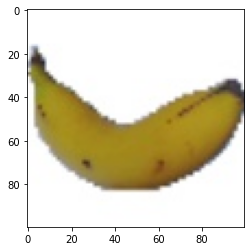

In [3]:
plt.imshow(train_image[0])


In [4]:
train_label[0]

'Banana'

In [11]:
trainlist, testlist = [], []
with open('train.txt') as f:
    for line in f:
        tmp = line.strip().split()
        trainlist.append([tmp[0], tmp[1]])
        
with open('test.txt') as f:
    for line in f:
        tmp = line.strip().split()
        testlist.append([tmp[0], tmp[1]])

In [12]:
IMG_H = 100
IMG_W = 100
IMG_C = 3

def readimg(path):
    img = plt.imread(path)
    return img

def batch(path, batch_size):
    img, label, paths = [], [], []
    for i in range(batch_size):
        img.append(readimg(path[0][0]))
        label.append(int(path[0][1]))
        path.append(path.pop(0))
        
    return img, label

In [13]:
num_class = 3 

with tf.Graph().as_default() as g:
    X = tf.placeholder(tf.float32, [None, IMG_H, IMG_W, IMG_C])
    Y = tf.placeholder(tf.int32, [None])

    with tf.variable_scope('CNN'):
        net = tf.layers.conv2d(X, 20, 3, (2, 2), padding='same', activation=tf.nn.relu)
        net = tf.layers.max_pooling2d(net, 2, 2)
        net = tf.layers.conv2d(net, 40, 3, (2, 2), padding='same', activation=tf.nn.relu)
        net = tf.layers.flatten(net)
     
        out = tf.layers.dense(net, num_class)
        
    with tf.variable_scope('Loss'):
        loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels= Y, logits=out))
        
    train = tf.train.AdamOptimizer(1e-3).minimize(loss)
    saver = tf.train.Saver()


In [14]:
np.sum([np.product(var.shape) for var in g.get_collection('trainable_variables')]).value

28083

In [15]:
batch_size = 1461
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(30):
        batch_data, batch_label = batch(trainlist, batch_size)
        _, l = sess.run([train, loss], feed_dict = {X: batch_data, Y: batch_label})
        print(i, l)
        
    saver.save(sess, 'logs/model.ckpt', global_step = i+1)

0 71.962715
1 83.027565
2 139.79257
3 99.307175
4 36.04757
5 4.2081094
6 13.368515
7 17.79612
8 19.773077
9 14.902483
10 7.6401954
11 1.0908358
12 0.2993605
13 1.9476233
14 2.6622243
15 1.4830345
16 0.43281862
17 0.6510967
18 1.1497958
19 1.0415001
20 0.19586587
21 0.026126854
22 0.006507162
23 0.018782303
24 0.03442237
25 0.04329427
26 0.040723696
27 0.028680637
28 0.012236869
29 0.0016463588


In [10]:
acc = 0
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    checkpoint = tf.train.latest_checkpoint('logs')
    if checkpoint:
        saver.restore(sess, checkpoint)
    for i in range(len(testlist)):
        batch_data, batch_label = batch(testlist, 1)
        logit = sess.run(out, feed_dict = {X:batch_data})
        if np.argmax(logit[0]) == batch_label[0]:
            acc += 1
        else:
            print(logit[0], batch_label[0])
            
    print(acc/len(testlist))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from logs\model.ckpt-30
[ 31.116348 -57.24013   33.554226] 0
[ 29.855408 -50.8913    30.308716] 0
[ 29.192621 -51.485706  30.201086] 0
[ 28.609402 -50.615635  30.31313 ] 0
[ 21.743357 -23.868889  23.784807] 0
[ 20.538326 -22.131807  22.03987 ] 0
[ 21.7137   -17.833092  22.359943] 0
[ 18.657524 -18.67408   18.896763] 0
[ 15.37668  -17.981602  17.898571] 0
[ 13.876892 -19.890697  18.593538] 0
[ 17.198801 -18.059376  17.477942] 0
[ 15.629308 -21.196108  17.623383] 0
[ 16.054695 -21.618372  16.874619] 0
[ 15.80697  -22.798922  16.829693] 0
0.9714285714285714


0